In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

# Extension of Runaway Feedback Loop in predictive Policing (Ensign et al. 2018)

### Extension to three neighborhoods with non-uniform crime rates and only discovered crimes 

##### Pólya Urn

$\begin{pmatrix}
    \lambda_A & 0 & 0 \\
    0 & \lambda_B & 0 \\
    0 & 0 & \lambda_C
\end{pmatrix}$


#### Defining classes
- Pólya urn

In [2]:
class PolyaUrn:
    def __init__(self,red_b, black_b, green_b,lambda_A, lambda_B, lambda_C):
        self.red_b=red_b
        self.black_b=black_b
        self.green_b=green_b
        self.lambda_A=lambda_A
        self.lambda_B=lambda_B
        self.lambda_C=lambda_C
    def tot(self):
        return(self.red_b+self.black_b+self.green_b)
    def rate_red(self):
        return(self.red_b/self.tot())
    def rate_black(self):
        return(self.black_b/self.tot())
    def rate_green(self):
        return(self.green_b/self.tot())

#### Functions to simulate the model
- *draw_ball* : This function has the objective of drawing a ball of the urn to direct the officer.
- *observed_crime* : This function has the objective of simulating whether a crime is observed or not.
- *update_urn* : This function has the objective of updating a urn.
- *one_t* : This function has the objetive of simulating one period of the model.
- *N_t* : This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.

In [3]:
def draw_ball(urn):
    '''
    This function has the objective of drawing a ball of the urn to direct the officer.
    
    Params: 
    urn: an object class PolyaUrn
    
    Output:
    A character indicating whether the officer is going A or B.
    ''' 
    
    index=np.random.uniform(0, 1)*urn.tot()
    if index<=urn.red_b:
        hood='A'
    elif index>urn.red_b and index<=(urn.red_b+urn.black_b):
        hood='B'
    else:
        hood='C'
    return(hood)

def observed_crime (urn, hood):
    '''
    This function has the objective of simulating the rate of crimes observed
    
    Params: 
    lambda_p: the probability of a crime ocurring
    
    Output:
    A boolean indicating whether a crime is observed or not
    ''' 
    if hood=='A':
        lambda_p=urn.lambda_A
    elif hood=='B':
        lambda_p=urn.lambda_B
    else:
        lambda_p=urn.lambda_C
    #if lambda_p>1 or lambda_p<0:
        #print('The probability lambda ({}) is outside of the range [0,1]'.format(lambda_p))
    
    observed=lambda_p
    return(observed)
    
def update_urn(urn, hood, crime_observed):
    '''
    This function has the objective of updating a urn.
    
    Params: 
    urn: an object class PolyaUrn
    hood: a character indicating the neighborhood
    crime_observed: a boolean value indicating if the crime was observed
    
    Output:
    The updated urn
    ''' 
    if hood=='A':
        urn.red_b=urn.red_b+crime_observed
    elif hood=='B':
        urn.black_b=urn.black_b+crime_observed
    else:
        urn.green_b=urn.green_b+crime_observed
    return(urn)
    
def one_t (urn, verbose=False):
    '''
    This function has the objetive of simulating one period of the model.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    
    Output:
    An updated urn after a period
    ''' 
    
    hood=draw_ball(urn)
    bool_crime=observed_crime(urn, hood)
    if verbose:
        if bool_crime:
            verb='did'
        else:
            verb="didn't"
        print('The officer was sent to the neighborhood {}, and he {} observe a crime'.format(hood, verb))
    urn_updated=update_urn(urn, hood, crime_observed=bool_crime)
        
    
    return(urn_updated)

def N_t(urn, N, verbose=False):
    '''
    This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    N: the number of periods 
    
    Output:
    An updated urn after a period
    ''' 
    history_red=[]
    history_black=[]
    history_green=[]
    history_red_rate=[]
    history_black_rate=[]
    history_green_rate=[]
    for i in range(0, N):
        urn=one_t(urn, verbose=False)
        history_red.append(urn.red_b)
        history_black.append(urn.black_b)
        history_green.append(urn.green_b)
        history_red_rate.append(urn.rate_red())
        history_green_rate.append(urn.rate_green())
        history_black_rate.append(urn.rate_black())
        if verbose:
            if N<=1000:
                if i%100==0:
                    print('Period: {}'.format(i))
            elif N<=10000:
                if i%1000==0:
                    print('Period: {}'.format(i))
            else:
                if i%10000==0:
                    print('Period: {}'.format(i))

    return history_red, history_black, history_green, history_red_rate, history_black_rate, history_green_rate

#### Defining hyperparameters and the Pólya-Urn

In [4]:
lambda_A=6 # probability of crime ocurring in the neighborhood A
lambda_B=6 # probability of crime ocurring in the neighborhood B
lambda_C=6
red_balls=200 # The starting Red balls, current observed crimes in A
black_balls=200 # The starting Black balls, current observed crimes in B
green_balls=200
N=10000 #Numer of periods
urn=PolyaUrn(red_b=red_balls, black_b=black_balls, green_b=green_balls,
             lambda_A=lambda_A, lambda_B=lambda_B, lambda_C=lambda_C) # definition of the urn

In [5]:
%%time
## Run the model N times
red_rate_big=[]
for i in range(10):
    lambda_A=3 # probability of crime ocurring in the neighborhood A
    lambda_B=6 # probability of crime ocurring in the neighborhood B
    lambda_C=6
    red_balls=200 # The starting Red balls, current observed crimes in A
    black_balls=200 # The starting Black balls, current observed crimes in B
    green_balls=200
    N=1000000 #Numer of periods
    urn=PolyaUrn(red_b=red_balls, black_b=black_balls, green_b=green_balls,
                 lambda_A=lambda_A, lambda_B=lambda_B, lambda_C=lambda_C) # definition of the urn
    red, black, green,red_rate, black_rate, green_rate=N_t(urn, N, False)
    red_rate_big.append(red_rate)
    if i%10==0:
        print(i)
red, black, green,red_rate, black_rate, green_rate=N_t(urn, N, False)

0
Wall time: 1min 21s


Wall time: 3.53 s


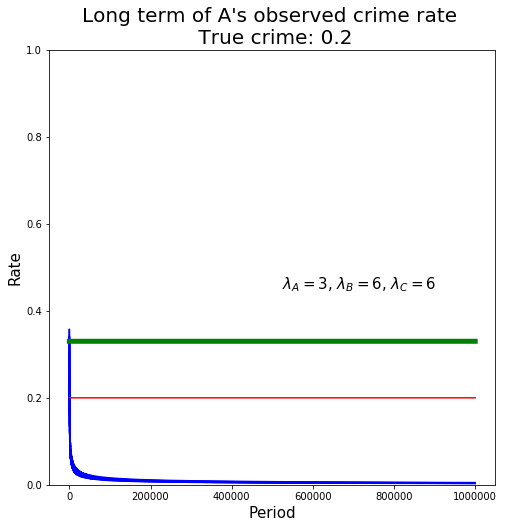

In [6]:
%%time
# Plot results
plt.figure(figsize=(8, 8))
for i in red_rate_big:
    plt.plot(list(range(0,N)), i, color='blue')
plt.plot(list(range(0,N)), [red_rate_big[0][0]]*N, color='green', linewidth=5)
plt.plot(list(range(0,N)), [urn.lambda_A/(urn.lambda_A+urn.lambda_B+urn.lambda_C)]*N, color='red')
#plt.plot(list(range(0,N)), [urn.lambda_B]*N, color='purple')
#plt.ylim([min([urn.lambda_A-0.1,red_balls/(red_balls+black_balls)-0.1]), max([urn.lambda_A+0.1,red_balls/(red_balls+black_balls)+0.1, max(red_rate)+0.1]) ])
plt.ylim([0,1])
plt.title("Long term of A's observed crime rate \n True crime: {}". format(urn.lambda_A/(urn.lambda_A+urn.lambda_B+urn.lambda_C)), fontsize=20)
plt.xlabel('Period', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.text(y=0.45, x=N-9.5*N/20, 
         s='$\lambda_A ={}$, $\lambda_B ={}$, $\lambda_C ={}$ '.format(urn.lambda_A, urn.lambda_B, urn.lambda_C), fontsize=15)
#plt.legend(('Rate of Red balls', 'Initial observed Red balls rate', '$\frac{\lambda_A/}{\lambda_A+\lambda_B+\lambda_C}=${}'.format(urn.lambda_A/(urn.lambda_A+urn.lambda_B+urn.lambda_C))));

## Correction of the feedback loop for three neighborhoods

To correct for three neigborhoods we follow the same logic as for two neighborhoods, making the new probability of adding a red ball $$\frac{n_a}{N}\lambda_a \frac{n_b}{N}\frac{n_c}{N}$$ where $N=n_a+n_b+n_c$ 

#### Defining classes
- Pólya urn

In [7]:
class PolyaUrn:
    def __init__(self,red_b, black_b, green_b,lambda_A, lambda_B, lambda_C):
        self.red_b=red_b
        self.black_b=black_b
        self.green_b=green_b
        self.lambda_A=lambda_A
        self.lambda_B=lambda_B
        self.lambda_C=lambda_C
    def tot(self):
        return(self.red_b+self.black_b+self.green_b)
    def rate_red(self):
        return(self.red_b/self.tot())
    def rate_black(self):
        return(self.black_b/self.tot())
    def rate_green(self):
        return(self.green_b/self.tot())

#### Functions to simulate the model
- *draw_ball* : This function has the objective of drawing a ball of the urn to direct the officer.
- *observed_crime* : This function has the objective of simulating whether a crime is observed or not.
- *update_urn* : This function has the objective of updating a urn.
- *one_t* : This function has the objetive of simulating one period of the model.
- *N_t* : This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.

In [8]:
def draw_ball(urn):
    '''
    This function has the objective of drawing a ball of the urn to direct the officer.
    
    Params: 
    urn: an object class PolyaUrn
    
    Output:
    A character indicating whether the officer is going A or B.
    ''' 
    
    index=np.random.uniform(0, 1)*urn.tot()
    if index<=urn.red_b:
        hood='A'
    elif index>urn.red_b and index<=(urn.red_b+urn.black_b):
        hood='B'
    else:
        hood='C'
    return(hood)

def observed_crime (urn, hood):
    '''
    This function has the objective of simulating the rate of crimes observed
    
    Params: 
    lambda_p: the probability of a crime ocurring
    
    Output:
    A boolean indicating whether a crime is observed or not
    ''' 
    if hood=='A':
        lambda_p=urn.lambda_A
    elif hood=='B':
        lambda_p=urn.lambda_B
    else:
        lambda_p=urn.lambda_C
    #if lambda_p>1 or lambda_p<0:
        #print('The probability lambda ({}) is outside of the range [0,1]'.format(lambda_p))
    
    observed=lambda_p
    return(observed)
    
def update_urn(urn, hood, crime_observed):
    '''
    This function has the objective of updating a urn.
    
    Params: 
    urn: an object class PolyaUrn
    hood: a character indicating the neighborhood
    crime_observed: a boolean value indicating if the crime was observed
    
    Output:
    The updated urn
    ''' 
    rand = random.uniform(0,1)
    
    if hood=='A':
        weighted=(random.uniform(0,1))<(urn.black_b/urn.tot()) and  (random.uniform(0,1))<(urn.green_b/urn.tot())
    elif hood=='B':
        weighted=(random.uniform(0,1))<(urn.red_b/urn.tot()) and  (random.uniform(0,1))<(urn.green_b/urn.tot())
    else:
        weighted=(random.uniform(0,1))<(urn.black_b/urn.tot()) and  (random.uniform(0,1))<(urn.red_b/urn.tot())
        
        
    if weighted:
        if hood=='A':
            urn.red_b=urn.red_b+crime_observed
        elif hood=='B':
            urn.black_b=urn.black_b+crime_observed
        else:
            urn.green_b=urn.green_b+crime_observed
        return(urn)
    else:
        return(urn)
    
    
def one_t (urn, verbose=False):
    '''
    This function has the objetive of simulating one period of the model.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    
    Output:
    An updated urn after a period
    ''' 
    
    hood=draw_ball(urn)
    bool_crime=observed_crime(urn, hood)
    if verbose:
        if bool_crime:
            verb='did'
        else:
            verb="didn't"
        print('The officer was sent to the neighborhood {}, and he {} observe a crime'.format(hood, verb))
    urn_updated=update_urn(urn, hood, crime_observed=bool_crime)
        
    
    return(urn_updated)

def N_t(urn, N, verbose=False):
    '''
    This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    N: the number of periods 
    
    Output:
    An updated urn after a period
    ''' 
    history_red=[]
    history_black=[]
    history_green=[]
    history_red_rate=[]
    for i in range(0, N):
        urn=one_t(urn, verbose=False)
        history_red.append(urn.red_b)
        history_black.append(urn.black_b)
        history_green.append(urn.green_b)
        history_red_rate.append(urn.rate_red())
        if verbose:
            if N<=1000:
                if i%100==0:
                    print('Period: {}'.format(i))
            elif N<=10000:
                if i%1000==0:
                    print('Period: {}'.format(i))
            else:
                if i%10000==0:
                    print('Period: {}'.format(i))

    return history_red, history_black, history_green, history_red_rate

#### Defining hyperparameters and the Pólya-Urn

In [9]:
lambda_A=6 # probability of crime ocurring in the neighborhood A
lambda_B=4 # probability of crime ocurring in the neighborhood B
lambda_C=2
red_balls=300 # The starting Red balls, current observed crimes in A
black_balls=300 # The starting Black balls, current observed crimes in B
green_balls=300
N=10000 #Numer of periods
urn=PolyaUrn(red_b=red_balls, black_b=black_balls, green_b=green_balls,
             lambda_A=lambda_A, lambda_B=lambda_B, lambda_C=lambda_C) # definition of the urn

In [10]:
%%time
## Run the model N times
red, black, green,red_rate=N_t(urn, N, False)

Wall time: 132 ms


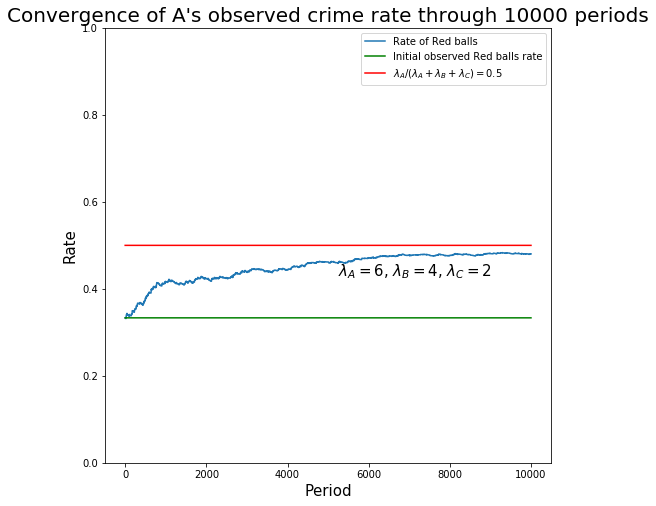

In [11]:
# Plot results
plt.figure(figsize=(8, 8))
plt.plot(list(range(0,N)), red_rate)
plt.plot(list(range(0,N)), [red_rate[0]]*N, color='green')
plt.plot(list(range(0,N)), [urn.lambda_A/(urn.lambda_A+urn.lambda_B+urn.lambda_C)]*N, color='red')
#plt.plot(list(range(0,N)), [urn.lambda_B]*N, color='purple')
#plt.ylim([min([urn.lambda_A-0.1,red_balls/(red_balls+black_balls)-0.1]), max([urn.lambda_A+0.1,red_balls/(red_balls+black_balls)+0.1, max(red_rate)+0.1]) ])
plt.ylim([0,1])
plt.title("Convergence of A's observed crime rate through {} periods". format(N), fontsize=20)
plt.xlabel('Period', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.text(y=min([urn.lambda_A-0.07,red_balls/(red_balls+black_balls)-0.07]), x=N-9.5*N/20, s='$\lambda_A ={}$, $\lambda_B ={}$, $\lambda_C ={}$ '.format(urn.lambda_A, urn.lambda_B, urn.lambda_C), fontsize=15)
plt.legend(('Rate of Red balls', 'Initial observed Red balls rate', '$\lambda_A/(\lambda_A+\lambda_B+\lambda_C)=${}'.format(urn.lambda_A/(urn.lambda_A+urn.lambda_B+urn.lambda_C))));

## Correction of the feedback loop for $n$ neighborhoods

### To correct for $n$ neigborhoods we follow the same logic as for three neighborhoods, making the new probability of adding a ball corresponding to the _i'th_ neighborhood $$\frac{\lambda_i}{N^n}\prod_{i=1}^n n_i $$ where $N=\sum_{i=1}^n n_i$ and $\lambda_i$ is the probability of observing a crime in the neighborhood _i_

#### Defining classes
- Pólya urn

In [12]:
class PolyaUrn:
    def __init__(self,list_balls,list_lambdas):
        self.balls=list_balls
        self.lambdas=list_lambdas
    def tot(self):
        return(sum(self.balls))
    def rate_i(self, i):
        return(self.balls[i]/self.tot())
    def true_crime_i(self, i):
        return(self.lambdas[i]/sum(self.lambdas))
    def test(self):
        size=len(self.balls)==len(self.lambdas)
        if size:
            msg='There as many lambdas as neighborhoods ({})'.format(len(self.balls))
        else: 
            msg='There NOT the same number of lambdas ({}) and neighborhoods ({})'.format(len(self.lambdas), len(self.balls))
        return(msg)

#### Functions to simulate the model
- *draw_ball* : This function has the objective of drawing a ball of the urn to direct the officer.
- *observed_crime* : This function has the objective of simulating whether a crime is observed or not.
- *update_urn* : This function has the objective of updating a urn.
- *one_t* : This function has the objetive of simulating one period of the model.
- *N_t* : This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.

In [13]:
def draw_ball(urn):
    '''
    This function has the objective of drawing a ball of the urn to direct the officer.
    
    Params: 
    urn: an object class PolyaUrn
    
    Output:
    A number indicating where the officer is going to be directed. 
    ''' 
    
    index=np.random.uniform(0, urn.tot())
    for i in range(len(urn.balls)):
        which=index<=np.cumsum(urn.balls[:(i+1)])[-1]
        if which:
            hood=i
            break
    return(hood)

   
def update_urn(urn, hood):
    '''
    This function has the objective of updating a urn with the correction of the bias.
    
    Params: 
    urn: an object class PolyaUrn
    hood: a number indicating the neighborhood
        
    Output:
    The updated urn
    ''' 
   
    lambda_i=urn.lambdas[hood]*1
    
    ## Correction
    rand=[]
    for i in range(len(urn.balls)-1):
        rand.append(random.uniform(0,1))
    rates=[]
    for i in range(len(urn.balls)):
        if i!=hood:
            rates.append(urn.rate_i(i))
    boolean=[]
    for i in range(len(rates)):
        boolean.append(rand[i]<rates[i])
    
    weighted=sum(boolean)==len(rates)
    if weighted:
        urn.balls[hood]=urn.balls[hood]+lambda_i
        return(urn)
    else:
        return(urn)
    
    
def one_t (urn, verbose=False):
    '''
    This function has the objetive of simulating one period of the model.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    
    Output:
    An updated urn after a period
    ''' 
    
    hood=draw_ball(urn)
    urn_updated=update_urn(urn, hood)        
    
    return(urn_updated)

def N_t(urn, N, hood_desired=0,verbose=False):
    '''
    This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    N: the number of periods 
    
    Output:
    An updated urn after a period
    ''' 

    history_rate=[]
    for i in range(0, N):
        urn=one_t(urn, verbose=False)
        history_rate.append(urn.rate_i(hood_desired))
        if verbose:
            if N<=1000:
                if i%100==0:
                    print('Period: {}'.format(i))
            elif N<=10000:
                if i%1000==0:
                    print('Period: {}'.format(i))
            else:
                if i%10000==0:
                    print('Period: {}'.format(i))

    return history_rate

#### Defining hyperparameters and the Pólya-Urn

In [14]:
lambdas=[7, 2, 3.5, 4.5]
balls=[100, 200, 150, 500]
N=100000 #Numer of periods
urn=PolyaUrn(list_lambdas=lambdas, list_balls=balls) # definition of the urn

In [15]:
%%time
## Run the model N times
rate=N_t(urn, N, hood_desired=0, verbose=False)

Wall time: 5.49 s


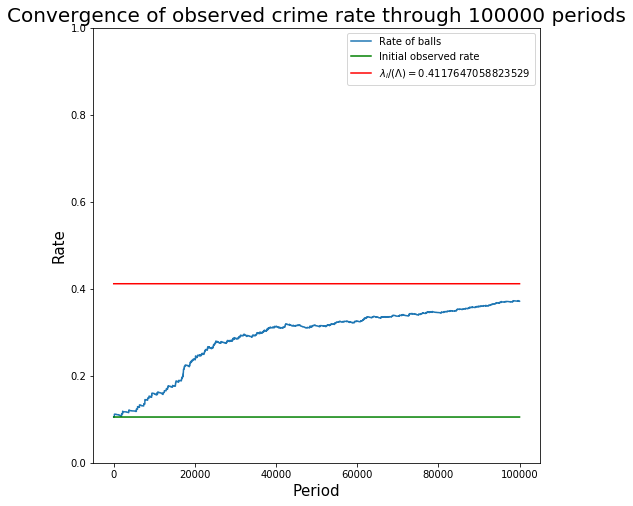

In [16]:
# Plot results
plt.figure(figsize=(8, 8))
plt.plot(list(range(0,N)), rate)
plt.plot(list(range(0,N)), [rate[0]]*N, color='green')
plt.plot(list(range(0,N)), [urn.true_crime_i(0)]*N, color='red')
#plt.plot(list(range(0,N)), [urn.lambda_B]*N, color='purple')
#plt.ylim([min([urn.lambda_A-0.1,red_balls/(red_balls+black_balls)-0.1]), max([urn.lambda_A+0.1,red_balls/(red_balls+black_balls)+0.1, max(red_rate)+0.1]) ])
plt.ylim([0,1])
plt.title("Convergence of observed crime rate through {} periods". format(N), fontsize=20)
plt.xlabel('Period', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.legend(('Rate of balls', 'Initial observed rate', '$\lambda_i/(\Lambda)=${}'.format(urn.true_crime_i(0))));

## Correction of the feedback loop for $n$ neighborhoods accounting for reports

To correct for $n$ neigborhoods we follow the same logic as for three neighborhoods, making the new probability of adding a ball corresponding to the _i'th_ neighborhood $$\frac{\lambda_i}{N^n}\prod_{i=1}^n n_i $$ where $N=\sum_{i=1}^n n_i$ and $\lambda_i$ is the probability of observing a crime in the neighborhood _i_

#### Defining classes
- Pólya urn

In [17]:
class PolyaUrn:
    def __init__(self,list_balls,list_lambdas, w_r, w_d):
        self.balls=list_balls
        self.lambdas=list_lambdas
        self.report_rate=w_r
        self.discover_rate=w_d
    def tot(self):
        return(sum(self.balls))
    def rate_i(self, i):
        return(self.balls[i]/self.tot())
    def true_crime_i(self, i):
        return(self.lambdas[i]/sum(self.lambdas))
    def test(self):
        size=len(self.balls)==len(self.lambdas)
        if size:
            msg='There as many lambdas as neighborhoods ({})'.format(len(self.balls))
        else: 
            msg='There NOT the same number of lambdas ({}) and neighborhoods ({})'.format(len(self.lambdas), len(self.balls))
        return(msg)

#### Functions to simulate the model
- *draw_ball* : This function has the objective of drawing a ball of the urn to direct the officer.
- *observed_crime* : This function has the objective of simulating whether a crime is observed or not.
- *update_urn* : This function has the objective of updating a urn.
- *one_t* : This function has the objetive of simulating one period of the model.
- *N_t* : This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.

In [18]:
def draw_ball(urn):
    '''
    This function has the objective of drawing a ball of the urn to direct the officer.
    
    Params: 
    urn: an object class PolyaUrn
    
    Output:
    A number indicating where the officer is going to be directed. 
    ''' 
    
    index=np.random.uniform(0, urn.tot())
    for i in range(len(urn.balls)):
        which=index<=np.cumsum(urn.balls[:(i+1)])[-1]
        if which:
            hood=i
            break
    print(hood)
    return(hood)
    
   
def update_urn(urn, hood):
    '''
    This function has the objective of updating a urn with the correction of the bias.
    
    Params: 
    urn: an object class PolyaUrn
    hood: a number indicating the neighborhood
        
    Output:
    The updated urn
    ''' 
    
    
    
    urn.balls=np.add(urn.balls, np.multiply(urn.lambdas, urn.report_rate))
    
    
    lambda_i=urn.lambdas[hood]
    
    ## Correction
    rand=[]
    for i in range(len(urn.balls)-1):
        rand.append(random.uniform(0,1))
    rates=[]
    for i in range(len(urn.balls)):
        if i!=hood:
            rates.append(urn.rate_i(i))
    boolean=[]
    for i in range(len(rates)):
        boolean.append(rand[i]<rates[i])
    
    weighted=sum(boolean)==len(rates)
    if weighted:
        urn.balls[hood]=urn.balls[hood]+lambda_i*100000
        return(urn)
    else:
        return(urn)
    
    
def one_t (urn, verbose=False):
    '''
    This function has the objetive of simulating one period of the model.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    
    Output:
    An updated urn after a period
    ''' 
    
    hood=draw_ball(urn)
    urn_updated=update_urn(urn, hood)        
    
    return(urn_updated)

def N_t(urn, N, hood_desired=0,verbose=False):
    '''
    This function has the objetive of simulating N periods of the model and saving the history of logs of Red and Black balls and the Red Rate.
    
    Params: 
    urn: an object class PolyaUrn
    lambda_uni: the probability of a crime ocurring
    N: the number of periods 
    
    Output:
    An updated urn after a period
    ''' 

    history_rate=[]
    history_diff=[]
    balls=[]
    for i in range(0, N):
        urn=one_t(urn, verbose=False)
        balls.append(urn.balls)
        history_rate.append(urn.rate_i(hood_desired))
        history_diff.append([urn.rate_i(i)-urn.true_crime_i(i) for i in range(len(urn.balls))])
        if verbose:
            if N<=1000:
                if i%100==0:
                    print('Period: {}'.format(i))
            elif N<=10000:
                if i%1000==0:
                    print('Period: {}'.format(i))
            else:
                if i%10000==0:
                    print('Period: {}'.format(i))

    return history_rate, history_diff,balls

#### Defining hyperparameters and the Pólya-Urn

In [19]:
lambdas=[5, 2, 3.5, 4.5, 9, 4.6, 5]
balls=[900, 100, 200, 500, 50, 120, 400]
w_r=0.6
w_d=0.4
N=1000 #Numer of periods
urn=PolyaUrn(list_lambdas=lambdas, list_balls=balls, w_r=w_r, w_d=w_d) # definition of the urn
print(urn.test())

There as many lambdas as neighborhoods (7)


In [20]:

## Run the model N times
rate, diff,bolas=N_t(urn, N, hood_desired=0, verbose=False)

1
4
0
0
0
0
0
3
3
0
2
6
0
3
6
2
5
6
0
6
6
5
6
0
4
3
0
5
3
0
0
0
6
6
3
0
5
0
5
6
3
0
6
0
6
0
3
0
6
3
0
0
6
0
2
0
0
6
0
3
4
2
0
5
2
0
3
3
5
0
0
1
6
2
0
0
3
0
0
0
0
4
0
0
4
0
6
0
5
6
0
2
0
4
2
6
2
1
0
3
2
1
3
0
0
4
5
3
6
6
0
0
3
3
0
0
4
0
2
0
0
2
4
0
4
6
3
5
3
4
4
5
3
2
6
0
0
0
0
1
0
5
2
6
3
6
3
0
4
3
2
3
6
5
3
4
3
0
0
4
3
0
0
4
4
3
5
3
0
5
2
5
6
2
5
4
0
4
0
3
0
6
0
3
0
6
2
4
0
6
5
0
5
5
2
6
0
2
4
3
2
5
4
1
0
4
5
5
0
4
6
0
3
4
4
6
4
4
5
2
4
3
5
3
6
5
4
4
0
6
6
5
4
0
0
3
5
4
5
3
1
6
6
0
0
6
0
2
6
6
6
0
2
2
6
4
1
5
3
6
1
5
0
2
1
4
0
5
5
4
0
3
4
0
0
0
3
1
6
6
3
4
6
6
6
5
3
2
4
1
4
5
4
3
3
3
3
4
1
2
5
4
1
4
6
0
3
6
6
0
6
2
1
4
5
4
4
5
3
3
6
0
2
4
4
2
0
2
3
6
6
2
4
4
5
4
2
5
6
3
3
4
0
3
0
0
1
4
3
5
0
4
4
0
0
6
3
4
0
1
6
3
4
0
4
5
2
3
2
4
3
4
3
2
2
0
4
3
0
4
3
3
3
4
6
3
0
1
0
1
5
3
4
4
5
0
3
4
6
2
4
0
3
6
4
5
2
5
6
6
2
0
2
0
2
0
6
6
4
4
4
2
5
4
4
5
6
4
3
6
0
4
4
3
3
3
4
5
6
4
4
3
1
2
6
5
6
0
0
0
2
0
4
3
5
5
1
1
5
3
6
0
4
5
4
4
1
3
1
4
4
3
6
6
5
4
0
6
1
3
0
4
6
4
6
4
4
6
3
2
1
6
0
3
4
0
4
3
1
2


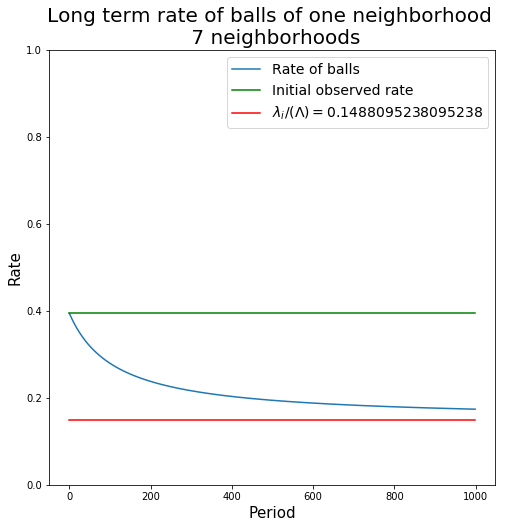

In [21]:
# Plot results
plt.figure(figsize=(8, 8))
plt.plot(list(range(0,N)), rate)
plt.plot(list(range(0,N)), [rate[0]]*N, color='green')
plt.plot(list(range(0,N)), [urn.true_crime_i(0)]*N, color='red')
#plt.plot(list(range(0,N)), [urn.lambda_B]*N, color='purple')
#plt.ylim([min([urn.lambda_A-0.1,red_balls/(red_balls+black_balls)-0.1]), max([urn.lambda_A+0.1,red_balls/(red_balls+black_balls)+0.1, max(red_rate)+0.1]) ])
plt.ylim([0,1])
plt.title("Long term rate of balls of one neighborhood \n {} neighborhoods".format(len(urn.balls)) , fontsize=20)
plt.xlabel('Period', fontsize=15)
plt.ylabel('Rate',fontsize=15)
plt.legend(('Rate of balls', 'Initial observed rate', '$\lambda_i/(\Lambda)=${}'.format(urn.true_crime_i(0))), fontsize=14);

In [22]:
diff=pd.DataFrame(diff)

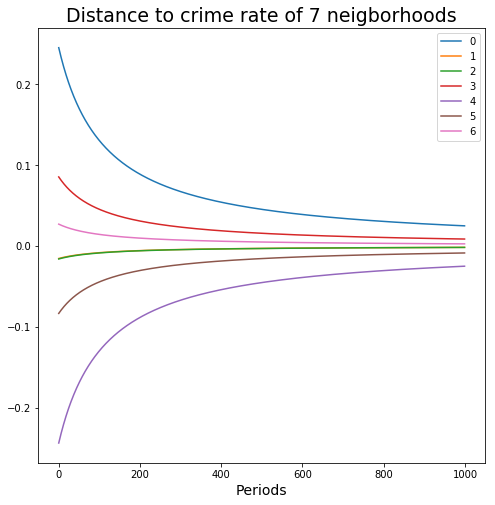

In [23]:
plt.figure(figsize=(8, 8))
for i in diff.columns:
    plt.plot(range(N), diff.loc[:,i])
plt.title('Distance to crime rate of {} neigborhoods'.format(len(urn.balls)), fontsize=19)
plt.xlabel('Periods', fontsize=14);
plt.legend()

In [24]:
for i in diff.columns:
    print(i)

0
1
2
3
4
5
6
